# <center>Prize draw using the CSP algorithm || CSP السحب على الجوائز باستخدام خوارزمية</center>


<h3>Table of Contents || جدول المحتويات</h3>

- [Introduction || المقدمة](#introduction)


- [Description of the problem || وصف المشكلة](#Problem)


- [CSP Algorithms || CSP خوارزميات](#Algorithms)
  - [AC-3 Algorithm || AC-3 خوارزمية](#AC-3)
  - [Backtracking Algorithm || Backtracking خوارزمية](#Backtracking)


- [The performance of the algorithm || آداء الخوارزمية](#Performance)


- [References || المراجع](#References)

<a id='introduction'></a>
# <center>Introduction || المقدمة</center>
<p style="font-size: 18px">The project aims to implement two CSP algorithms on a real-life example. We used the AC-3 algorithm and Backtracking on our example which is prize draw. As shown in the image below, the example idea is that there are two types of gifts (boys and girls gifts) and we want to distribute them to two categories of persons (boys and girls). The AC-3 algorithm must first be used to determine the category of gifts that suit each person. If we assume that there are 4 boys and girls gifts and there are 4 boys and girls, then after using the algorithm we will allow each boy to take only one of the four boys’s gifts and each girl takes only one of the four girls ’gifts. Then we'll use the Backtracking algorithm to distribute one gift to each person.</p>

<p style="font-size: 19px">
يهدف المشروع إلى تنفيذ خوارزميتين من خوارزميات CSP على مثال من واقع الحياة. استخدمنا خوارزمية AC-3 و Backtracking على مثالنا وهو السحب على الجوائز. كما هو موضح في الصورة أدناه، فكرة المثال هو أن هناك نوعان من الهدايا (هدايا أولاد وبنات) ونريد توزيعها على فئتين من الأشخاص (أولاد وبنات). يجب استخدام خوارزمية AC-3 أولاً لتحديد فئة الهدايا الذي تناسب كل شخص، فإذا افترضنا أن هناك 4 هدايا أولاد وبنات وهناك 4 أولاد وبنات، فبعد استخدام الخوارزمية سنسمح لكل ولد أن يأخذ أحد هدايا الأولاد الأربع فقط وكل بنت تأخذ أحد هدايا البنات الأربع فقط. ثم سنستخدم خوارزمية Backtracking لتوزيع هدية واحدة لكل شخص.
<p/> 

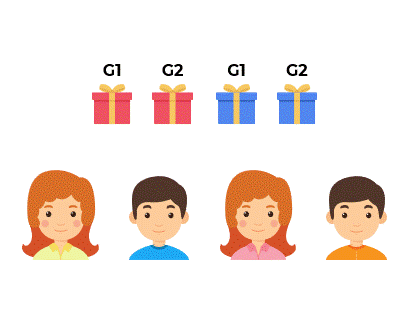

<a id='Problem'></a>
# <center>Description of the problem || وصف المشكلة</center>
### Our example (or our problem) is described as follows:
  - ## Target:
     - <p style="font-size: 18px">Every person receives a gift that matches his gender or sex.</p>
  - ## Variables (nodes):
     - <p style="font-size: 18px">All persons, whether they are boys or girls.</p>
  - ## Domain:
     - <p style="font-size: 18px">All gifts, whether gifts for boys or girls.</p>
  - ## Constraints:
     - <p style="font-size: 18px">Each person has only one gift.</p>
     - <p style="font-size: 18px">The gender of the person must be equal to the same type of gift.</p>

### يتم وصف مثالنا (أو مشكلتنا) على النحو التالي:
- ## الهدف:
   - <p style="font-size: 19px">حصول كل شخص على هدية تناسب نوعه أو جنسه.</p>

- ## المتغيرات (النود):
   - <p style="font-size: 19px">جميع الأشخاص، سواءً كانوا أولاد أم بنات.</p>

- ## الدومين:
   - <p style="font-size: 19px">جميع الهدايا، سواء كانت هدايا أولاد أم بنات.</p>

- ## الكونسترين:
   - <p style="font-size: 19px">كل شخص له هدية واحدة فقط.</p>
   - <p style="font-size: 19px">يجب أن يكون جنس الشخص مساوياً لنفس نوع الهدية.</p> 

<a id='Algorithms'></a>
# <center>CSP Algorithms || CSP خوارزميات</center>

### <center>Make the user enter the input  || جعل المستخدم يُدخل المدخلات</center>

In [ ]:
# ========== [Run inputs] ========== #

# Make the user choose the number of males and females gifts
# جعل المستخدم يختار عدد هدايا الذكور والاناث
print("Choose the number of gifts:")
num_M_gifts = int(input("  => Put the number of male gifts: "))
num_F_gifts = int(input("  => Put the number of female gifts: "))

# Make the user choose the number of males and females that the gifts will be distributed to them
# جعل المستخدم يختار عدد الذكور والإناث والذي سيتم توزيع الهدايا عليهم
print("\nChoose the number of persons:")
num_M = int(input("  => Put the number of male: "))
num_F = int(input("  => Put the number of female: "))

<a id='AC-3'></a>
# <center>AC-3 Algorithm || AC-3 خوارزمية</center>

### <center>Initialize the variables || تهيئة المتغيرات</center>

In [ ]:
# ========== [Define the variables] ========== #

# Create a list of gifts entered by the user
# إنشاء لست بالهدايا المدخلة من المستخدم
G_list = ["MG" + str(g + 1) for g in range(num_M_gifts)]
G_list += ["FG" + str(g + 1) for g in range(num_F_gifts)]

# Create a list of persons entered by the user (create a nodes)
# إنشاء لست بالأشخاص المدخلين من المستخدم (إنشاء نود)
P_list = ["M" + str(p + 1) for p in range(num_M)]
P_list += ["F" + str(p + 1) for p in range(num_F)]

# Determine whether a person is male or female
# تحديد كل الشخص ما إذا كان ذكر أم أنثى
P_type_list = {}

# Connecting persons with gifts (create domains)
# ربط الأشخاص بالهدايا (إنشاء الدومين)
P_G_list = {}

for val in P_list:
    P_type_list[val] = val[0]
    P_G_list[val] = G_list.copy()

# ========== [Delete a list] ========== #
    
# We no longer need to use this variable
# لم نعد بحاجة لاستخدام هذا المتغير
del G_list

### <center>Initialize the arcs and constraints || تهيئة الآرك والكونسترين</center>

In [ ]:
# ========== [Define the functions] ========== #

# Generating arcs and constraints for AC-3
# AC-3 توليد الآرك و الكونسترين لـ
def arcs_constraints_generator(operation_num = 1):
    
    # This function contains the constraints that will be check for all nodes 
    # هذه الدالة تحتوي على الكونسترين والذي سنتحقق بها من جميع النود
    def gen_con(value_x, value_y, P_type):
        
        # The result of the condition is "True", if the node type "P_type" is equal to the value previously placed
        # for it in the list "P_type_list", and the node value "value_x" is not equal to the other node value "value_y"
        # تكون نتيجة الشرط "ترو"، في حال كان نوع النود يساوي القيمة الموضوع له مسبقا في اللست، وقيمة النود لا تساوي قيمة النود الأخرى
        if P_type_list[P_type] == value_x[0] and ((len(P_list) > 1 and value_x != value_y) or (len(P_list) == 1)):
            return True
        
        else:
            return False

    # If "operation_num" == 1, then we want to create arcs
    # arcs إذا تحقق الشرط، فهذا يعني أننا نريد إنشاء
    if operation_num == 1:
        list = []
        
    # If "operation_num" == 2, then we want to create constraints
    # constraints إذا تحقق الشرط، فهذا يعني أننا نريد إنشاء
    else:
        list = {}
        
    # Generating arcs and constraints
    # توليد الآرك والكونسترين
    for node_x in P_list:

        for node_y in P_list:
        
            # If there is one node in the "P_list", it means that we want to compare the node with itself.
            # And if there is more than one node, then this means that we want to compare the node 
            # with another node not with itself
            # إذا كان هناك نود واحد، فهذا يعني أننا نريد أن نقارن النود مع نفسه
            # وإذا هناك أكثر من نود واحد، فهذا يعني أننا نريد أن نقارن النود مع نود آخر وليس مع نفسه
            if len(P_list) == 1 or (len(P_list) > 1 and node_x != node_y):

                # Generating arcs
                # توليد الآرك
                if operation_num == 1:
                    list.append((node_x, node_y))

                # Generating constraints
                # توليد الكونسترين
                else:
                    list[(node_x, node_y)] = gen_con
    
    return list

# ========== [Call the function] ========== #

arcs = arcs_constraints_generator()
constraints = arcs_constraints_generator(2)

### <center>Initialize the functions || تهيئة الدوال</center>

In [ ]:
# ========== [Define the function] ========== #

# A function that prints each nodes with its domain
# دالة تطبع كل نود مع الدومين الخاص بها
def print_nodes_domains():
    
    if (len(P_G_list) == 0):
        print("-")
        
    for (key, value) in P_G_list.items():
        print(key + ": " + str(value))
    
    print()

In [ ]:
# ========== [Define the function] ========== #

# A function that checks if there is any node has an empty domain from values after executing AC-3 
# AC-3 دالة تتأكد ما إذا كان هناك أي نود لها دومين فارغ من القيم بعد تنفيذ 
def is_domain_empty():

    if len(P_G_list) == 0:
        return True
    
    for value in P_G_list.values():

        if len(value) == 0:
            return True
        
    return False

In [ ]:
# ========== [Define the function] ========== #

# A function that checks whether there are any conflicting constraints between two nodes when executing AC-3 
# AC-3 دالة تتأكد ما إذا كان هناك أي كونسترين متعارضة بين نودين عند تنفيذ 
def check_nodes_consistent(node_x, node_y):
    
    is_consistent = False

    # Get "node_x" and "node_y" domains
    # "استخراج الدومين من كِلا "النودين
    x_domain = P_G_list[node_x]
    y_domain = P_G_list[node_y]

    # Get all arc "(node_x, node_y)" constraints
    # استدعاء الكونسترين الذي يتعلق بالنودين
    all_constraints = [con for con in constraints if con[0] == node_x and con[1] == node_y]

    for x_value in x_domain:
        
        satisfies = False
        
        for y_value in y_domain:
            
            for con in all_constraints:
                
                constraint_func = constraints[con]
                
                if constraint_func(x_value, y_value, node_x):
                    satisfies = True
                    
        # If the "satisfies" is not met, then there is a conflict in the value "x_value" taken from the "x_domain",
        # and therefore it must be removed from "x_domain"
        # إذا لم يتحقق الشرط، فهناك تعارض في القيمة المؤخوذة من الدومين، وبالتالي يجب ازالتها من الدومين
        if not satisfies:
            x_domain.remove(x_value)
            is_consistent = True

    return is_consistent

In [ ]:
# ========== [Define the function] ========== #

def AC3_algorithm(arcs):
    
    # Add all the "arcs" to a "queue"
    # "اضافة جميع "الآرك" في "الكيو
    queue = arcs[:]

    # Repeat until the "queue" is empty
    # التكرار حتى يصبح "الكيو" فارغ
    while queue:
         
        # Take the first arc off the "queue" (dequeue)
        # "استخراج أول "آرك" من "الكيو
        (node_x, node_y) = queue.pop(0)
        
        # Verify that the domain of "node_x" and "node_y" do not conflict with the constraints
        # التحقق من أن الدومين لكل من "النودين" لا يتعارضان مع الكونسترين الموضوعة
        is_consistent = check_nodes_consistent(node_x, node_y)
        
        # If the condition is met, then the "node_x" domain has changed
        # node_x إذا تحقق الشرط، فهذا يعني أنه قد حصل تغيير في دومين الـ
        if is_consistent:
            
            # Add all arcs of the form (node_k, node_x) to the queue (enqueue)
            # "اضافة جميع الآراك المتجاوريين إلى "الكيو
            neighbors = [neighbor for neighbor in arcs if neighbor[1] == node_x]
            queue = queue + neighbors

### <center>Run AC-3 Algorithm || AC-3 تشغيل خوازرمية</center>

In [ ]:
# ========== [Run algorithm] ========== #

print("Before running the AC3:")
print_nodes_domains()

AC3_algorithm(arcs)

print("After running the AC3:")
print_nodes_domains()

if is_domain_empty():
    print("AC-3 execution cannot continue due to empty domain. Please reset the inputs again")
    
# ========== [Delete a list] ========== #

# We no longer need to use this variable
# لم نعد بحاجة لاستخدام هذا المتغير
del P_list 

<a id='Backtracking'></a>
# <center>Backtracking Algorithm || Backtracking خوارزمية</center>

### <center>Initialize the variables || تهيئة المتغيرات</center>

In [ ]:
# ========== [Define the variables] ========== #

# Create a list to put the domain of each node
# انشاء لست لوضع دومين من كل نود
ac3_domain_list = []

# Create a list to extract one value from each domain exists in "ac3_domain_list" 
# "ac3_domain_list" انشاء لست لإستخراج قيمة واحدة من كل دومين موجود في
bt_domain_list = [None] * len(P_G_list)

for P_G in P_G_list.values():
    ac3_domain_list.append(P_G.copy())

### <center>Initialize the functions || تهيئة الدوال</center>

In [ ]:
# ========== [Define the function] ========== #

# A function that prints each node with its assigned value after executing BT
# BT دالة تطبع كل نود مع القيمة المسند لها بعد تنفيذ
def BT_result():

    counter = 0

    for key in P_G_list:
        P_G_list[key] = bt_domain_list[counter]
        counter += 1

    for (key, value) in P_G_list.items():
        print(key + ": " + value)

In [ ]:
# ========== [Define the function] ========== #

def BT_algorithm():
    
    # Used to transfer from one domain to another
    # يستخدم للإنتقال من دومين لآخر
    P_counter = 0
    
    # If the value is "False", then it means that there is no value assigned to it, and this is due to the user's input 
    # إذا كانت قيمة المتغير "فولس" فهذا يعني أن هناك نود لم يسند لها قيمة، وهذا يكمن بسبب مدخلات المستخدم
    stop_processing = False
    
    # If the condition is met, then we have assigned a different value to each node 
    # إذا تحقق الشرط، فهذا يعني أننا أسندنا قيمة مختلفة لكل نود
    while P_counter < len(P_G_list):

        if stop_processing:
            return False

        check_while_condition = stop_processing = False

        # Each value pulled from the list "ac3_domain_list" is considered node
        # كل قيمة يتم سحبها من اللست يعتبر نود
        for ac3_value in ac3_domain_list[P_counter]:
            
            # If the value of the variable is "True", we must check the while condition (while P_counter < len(P_G_list)
            # (while P_counter < len(P_G_list) while إذا كانت قيمة المتغير "ترو" فيجب أن نتحقق من شرط الـ
            if check_while_condition:
                break

            # Each value pulled from the list is considered node
            # كل قيمة يتم سحبها من اللست يعتبر نود
            for bt_value in bt_domain_list:

                # If the condition is met, then the two nodes have the same value,
                # and we must assign another value to the "ac3_value"
                # "ac3_value" إذا تحقق الشرط، فإن النودين لهما نفس القيمة، ويجب أن نسند قيمة أخرى لـ 
                if ac3_value == bt_value:
                    stop_processing = True
                    break

                # If the condition is met, then the node "bt_value" has no value,
                # and we must assign it the value of "ac3_value"
                # "ac3_value" إذا تحقق الشرط، فإن النود ليس له قيمة، ويجب أن نسند له قيمة الـ
                elif bt_value == None:
                    bt_domain_list[P_counter] = ac3_value
                    P_counter += 1
                    check_while_condition = True
                    stop_processing = False
                    break

                # There is a value for current node ("bt_value"), therefore we must verify the value of the next node 
                # هناك قيمة لنّود الحالي، ولذلك يجب أن نتحقق من قيمة النود التالي
                else:
                    continue
    
    return True

### <center>Run Backtracking Algorithm || Backtracking تشغيل خوازرمية</center>

In [ ]:
# ========== [Run algorithm] ========== #

if is_domain_empty() or not BT_algorithm():
    print("Backtracking cannot be executed due to a node not assigned a value. Please reset the inputs again")
        
else:
    BT_result()
    print("\nProgram execution has ended. Reset input if you want to run the program again")

<a id='Performance'></a>
# <center>The performance of the algorithm || آداء الخوارزمية</center>

# <center>Example 1 || المثال 1</center>

### <center>Enter inputs || ادخال المدخلات</center>
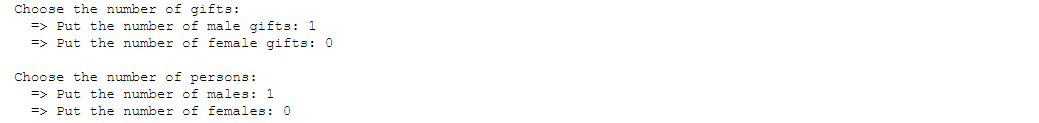

### <center>Results when using AC-3 || AC-3 النتائج عند استخدام</center>
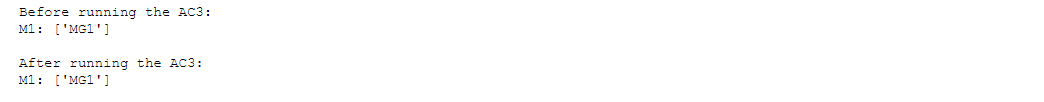

### <center>Results when using Backtracking || Backtracking النتائج عند استخدام</center>


# <center>Example 2 || المثال 2</center>

### <center>Enter inputs || ادخال المدخلات</center>
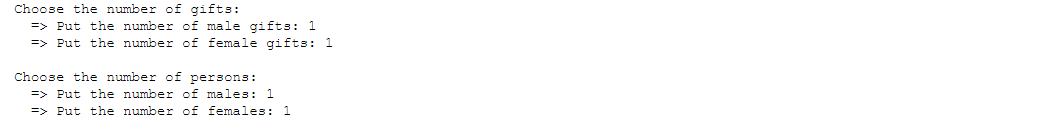

### <center>Results when using AC-3 || AC-3 النتائج عند استخدام</center>
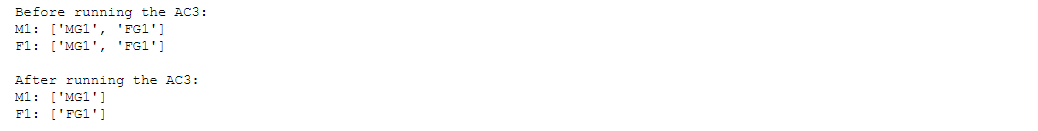

### <center>Results when using Backtracking || Backtracking النتائج عند استخدام</center>
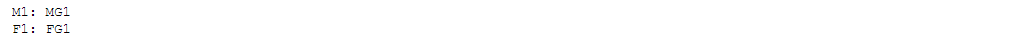

# <center>Example 3 || المثال 3</center>

### <center>Enter inputs || ادخال المدخلات</center>
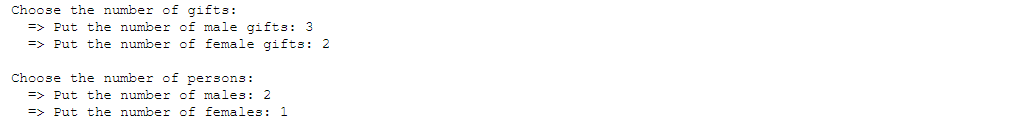

### <center>Results when using AC-3 || AC-3 النتائج عند استخدام</center>
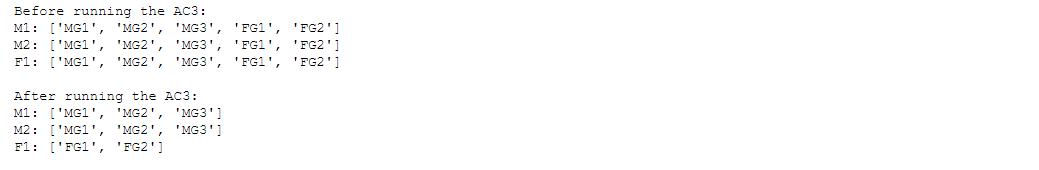

### <center>Results when using Backtracking || Backtracking النتائج عند استخدام</center>
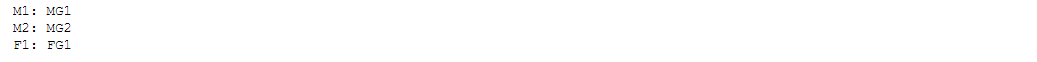

# <center>Example 4 || المثال 4</center>

### <center>Enter inputs || ادخال المدخلات</center>
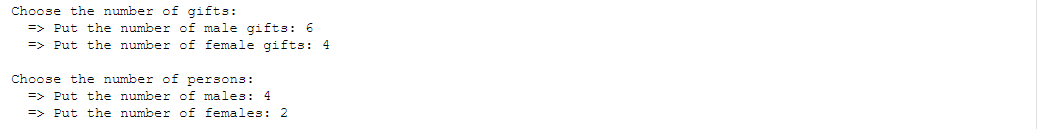

### <center>Results when using AC-3 || AC-3 النتائج عند استخدام</center>
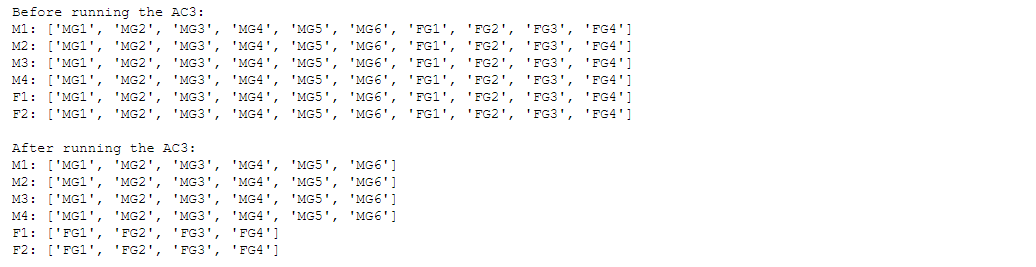

### <center>Results when using Backtracking || Backtracking النتائج عند استخدام</center>
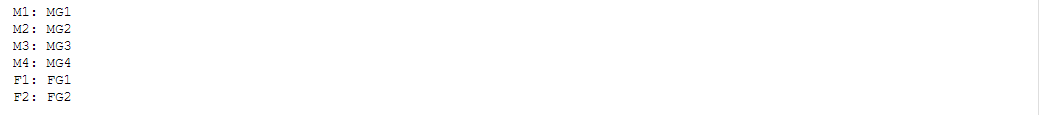

<a id='References'></a>
## <center>References || المراجع</center>

- <span style="font-size: 18px">AC-3 Algorithm in Python: </span>
<span style="font-size: 15px">https://medium.com/swlh/how-to-solve-constraint-satisfaction-problems-csps-with-ac-3-algorithm-in-python-f7a9be538cfe</span>